<a href="https://colab.research.google.com/github/saif-islam-rayhan/DataScience-and-ML/blob/main/Module_6_Assignment_Rayhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [ ]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())
df["species"] = iris.target

print(df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ..

In [ ]:
X = df.drop("species", axis=1)


In [ ]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# EDA

In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# Pairplot

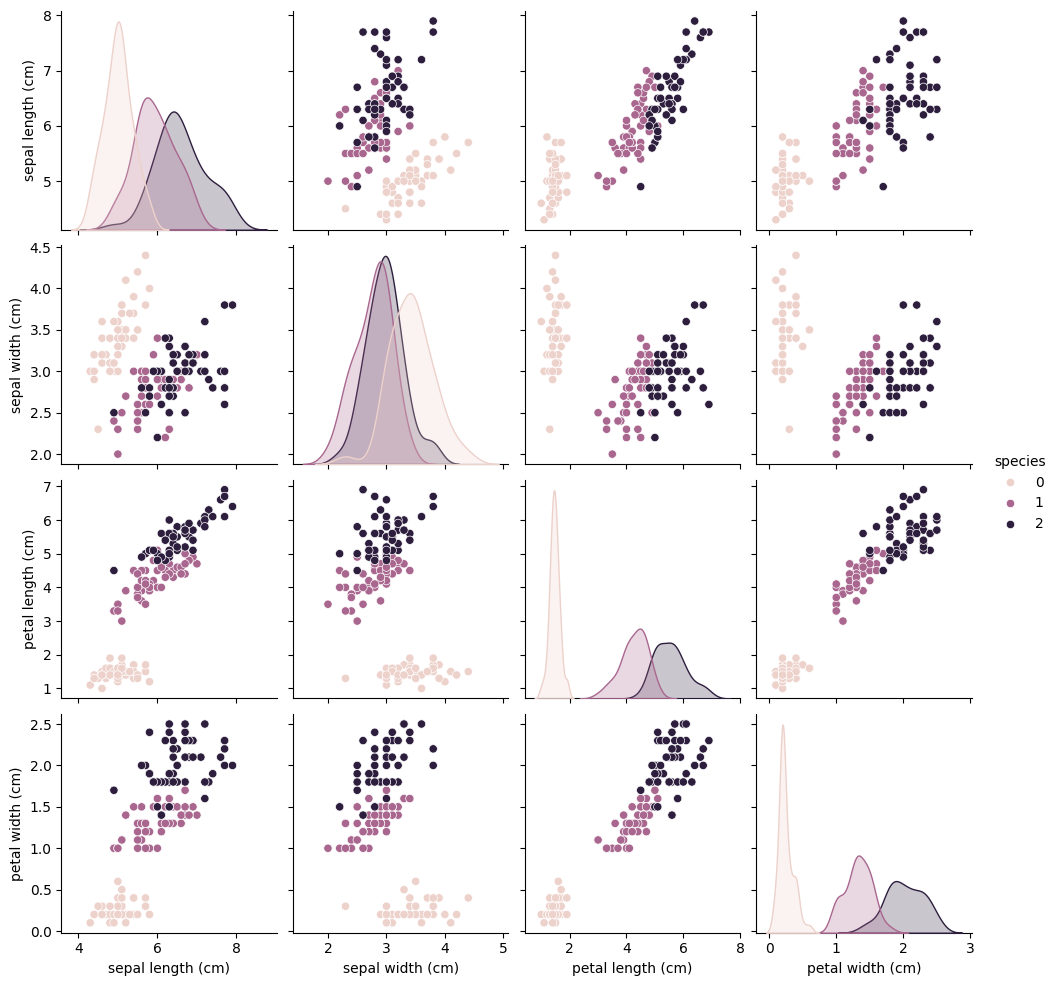

In [ ]:
sns.pairplot(df, hue="species")
plt.show()

# Heatmap

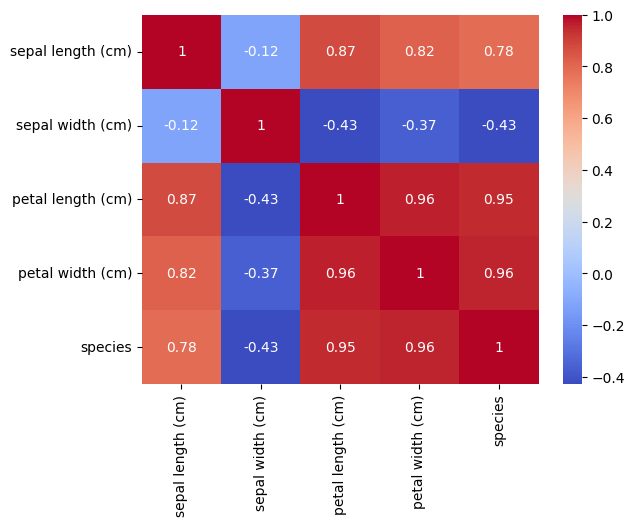

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

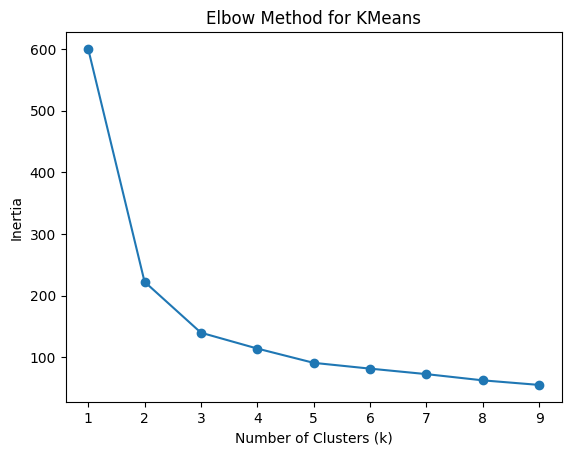

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Elbow Method
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)


# PCA for visualization

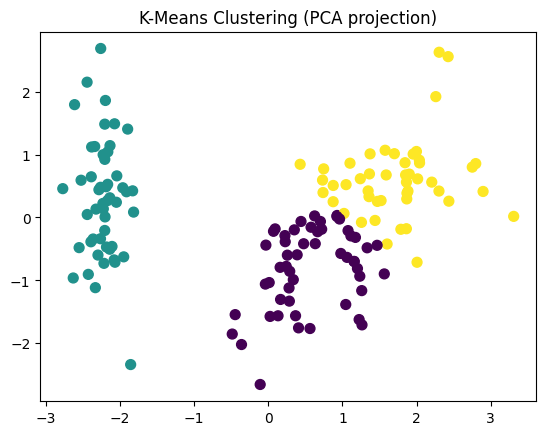

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap="viridis", s=50)
plt.title("K-Means Clustering (PCA projection)")
plt.show()

# Hierarchical Clustering

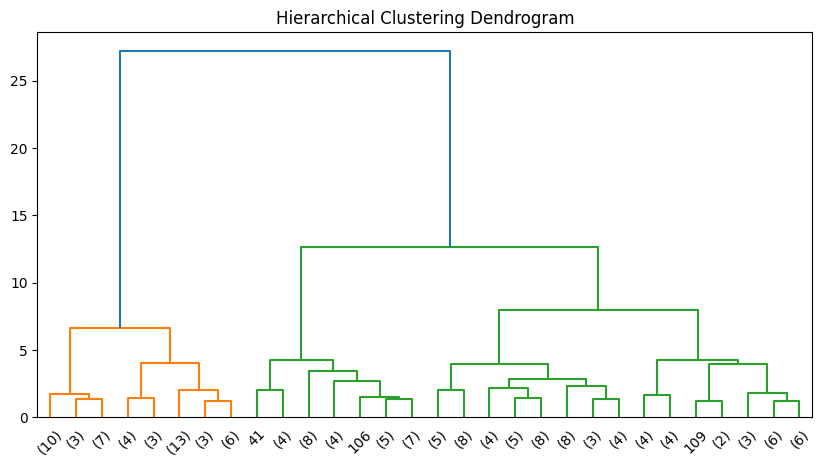

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

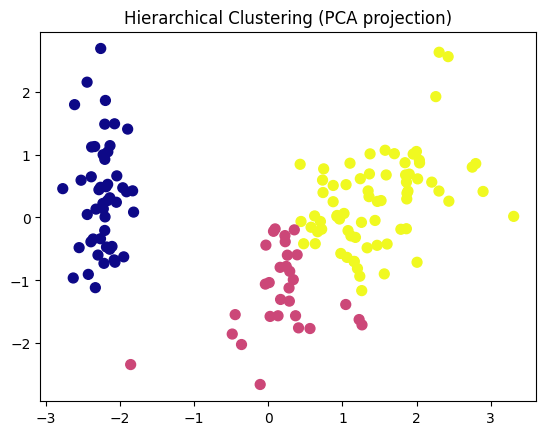

In [ ]:
# Choose clusters (cut tree at 3)
labels_hc = fcluster(Z, 3, criterion="maxclust")

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_hc, cmap="plasma", s=50)
plt.title("Hierarchical Clustering (PCA projection)")
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

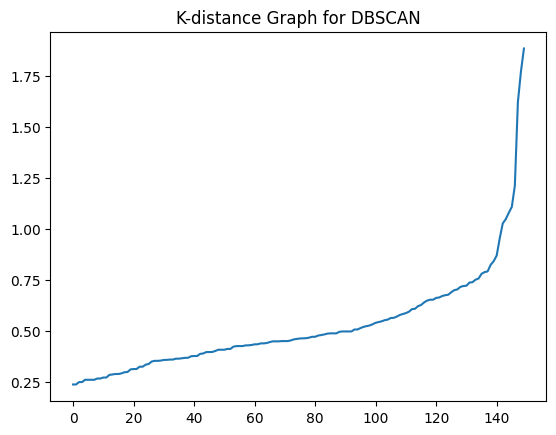

In [ ]:
# K-distance graph for eps
nn = NearestNeighbors(n_neighbors=5)
nn_fit = nn.fit(X_scaled)
distances, indices = nn_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])  # 4th neighbor
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN")
plt.show()

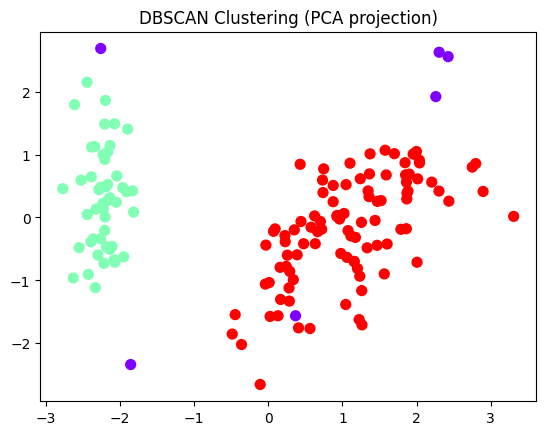

In [ ]:
# Try DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap="rainbow", s=50)
plt.title("DBSCAN Clustering (PCA projection)")
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

print("KMeans ARI:", adjusted_rand_score(df["species"], labels_km))
print("Hierarchical ARI:", adjusted_rand_score(df["species"], labels_hc))
print("DBSCAN ARI:", adjusted_rand_score(df["species"], labels_db))

print("Confusion Matrix (KMeans):")
print(confusion_matrix(df["species"], labels_km))

KMeans ARI: 0.6201351808870379
Hierarchical ARI: 0.6153229932145449
DBSCAN ARI: 0.5400773829118303
Confusion Matrix (KMeans):
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]
